<a href="https://colab.research.google.com/github/String137/Grad/blob/master/tograduate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/String137/Grad/archive/master.zip
!unzip master.zip
!mv Grad-master/datasets ./

--2019-02-20 04:21:03--  https://github.com/String137/Grad/archive/master.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/String137/Grad/zip/master [following]
--2019-02-20 04:21:03--  https://codeload.github.com/String137/Grad/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121, 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.4’

master.zip.4            [   <=>              ]  83.41M  25.9MB/s    in 3.2s    

2019-02-20 04:21:07 (25.9 MB/s) - ‘master.zip.4’ saved [87461077]

Archive:  master.zip
ade526f3f0da1831fd4fcbe48cf1d8655e2c679d
replace Grad-master/datasets/bee_data/bee_1.mp4? [y]es, [n]o, [A]ll, [N]one, [r

In [2]:
#!pip install ffmpeg-python

In [3]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [46]:
count = 0
videoFile = "datasets/bee_data/bee_1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
print(frameRate)

x = 1
while(cap.isOpened()):
  frameId = cap.get(1)
  #print(frameId)
  ret, frame = cap.read()
  if(ret != True):
    break
  if(frameId % 2 == 0):
    filename = "bee%d.jpg" % count;count += 1
    cv2.imwrite(filename, frame)
cap.release()
print('Done!')

30.0
Done!


/content


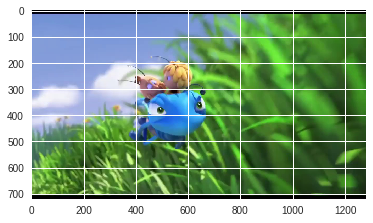

<Figure size 432x288 with 0 Axes>

In [43]:
for i in range(1):
  img = plt.imread('frame{}.jpg'.format(2*i+1508))
  plt.imshow(img)
  plt.figure()
  
import os
print(os.getcwd())

In [0]:
"""
import os
import zipfile
from pathlib import Path
zf = zipfile.ZipFile("bee1.zip", "w")
i = 0
while(Path('bee{}.jpg'.format(i)).exists()):
  zf.write('bee{}.jpg'.format(i))
  i += 1
zf.close()
"""

In [52]:
from google.colab import files
#files.download("bee1.zip")

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 46938, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
probe = ffmpeg.probe('datasets/bee_data/bee_1.mp4')

In [0]:
video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')

In [0]:
width = int(video_info['width'])
height = int(video_info['height'])
num_frames = int(video_info['nb_frames'])
out, err = (ffmpeg.input('datasets/bee_data/bee_1.mp4').output('pipe:',format='rawvideo',pix_fmt = 'rgb24').run(capture_stdout = True))
video = (np.frombuffer(out,np.uint8).reshape([-1, height, width, 3]))

TypeError: ignored

In [0]:
plt.imshow(video[10,:,:,:])

In [0]:
print(width, height, num_frames)

1280 720 7201
